This dataset contains information related to a manufacturing process, offering insights into various process parameters and product quality. In this Markdown cell, we will provide a brief overview of the dataset's structure and its key components.

- Temperature (°C): This column represents the temperature during the manufacturing process, measured in degrees Celsius. Temperature plays a critical role in many manufacturing processes, influencing material properties and product quality.

- Pressure (kPa): The pressure applied during the manufacturing process, measured in kilopascals (kPa). Pressure can affect the material transformation and the overall outcome of the manufacturing process.

- Temperature x Pressure: This feature is an interaction term between temperature and pressure, which captures the combined effect of these two process parameters.

- Material Fusion Metric: A derived metric calculated as the sum of the square of temperature and the cube of pressure. It represents a material fusion-related measurement during the manufacturing process.

- Material Transformation Metric: Another derived metric calculated as the cube of temperature minus the square of pressure. It provides insight into material transformation dynamics.

- Quality Rating: The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('manufacturing.csv')

In [ ]:
df.shape

(3957, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [ ]:
df.isnull().sum()

,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [ ]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [ ]:
#visulization of data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_copy = df.copy()

X = df_copy.drop('Quality Rating', axis=1)
y = df_copy['Quality Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1'])
pca_df['Target'] = y

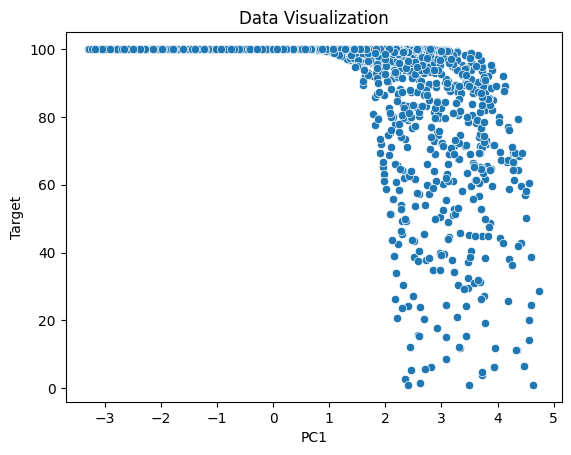

In [ ]:
sns.scatterplot(x='PC1', y='Target', data=pca_df)
plt.title('Data Visualization')
plt.show()

In [ ]:
X = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### without coveriting to polynomial

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 99.10258097894804
R2: 0.5145614193853506


### After converting to polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [ ]:
poly_model = LinearRegression()

In [ ]:
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
poly_model.coef_

array([-3.82018076e+01,  2.60874525e+00, -5.33437670e-02, -2.64643940e-02,
       -2.21174868e-03,  4.45808608e-01, -5.33346019e-02,  3.59354466e-04,
        1.00293001e-04,  4.44803001e-06,  4.02894973e-01, -1.55049378e-03,
        5.67793731e-04, -2.64223245e-06,  2.78814466e-06, -6.16788498e-07,
        4.05546768e-09, -1.47838790e-07,  3.73650817e-10, -8.78275230e-12])

In [ ]:
poly_model.intercept_

1420.9879501181135

In [ ]:
y_pred_poly = poly_model.predict(X_poly_test)

In [ ]:
print('MSE:', mean_squared_error(y_test, y_pred_poly))
print('R2:', r2_score(y_test, y_pred_poly))

MSE: 14.9775691027043
R2: 0.9266347070434111
